<a href="https://colab.research.google.com/github/LBohry/data-science/blob/master/Boston%20House%20Prices%20ML%20Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Boston House Prices***

### *Importing The Libraries* 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

In [ ]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

### *Importing The Dataset*

In [ ]:
dataset = pd.read_csv('boston.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### *Data Exploration And Cleaning*

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [ ]:
dataset.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### *Split The Dataset Into Training/Testing*

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**Target Value : MEDV: Median value of owner-occupied homes in $1000's [k$]**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


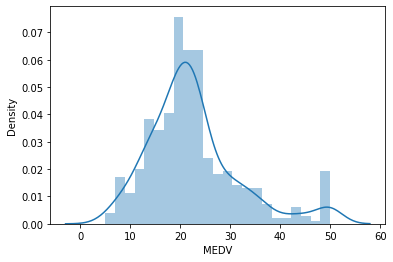

In [ ]:
sns.distplot(dataset['MEDV'])


### `Does price decrease as crime decrease ?`

Text(0.5, 1.0, 'Crime rate vs owner-home value')

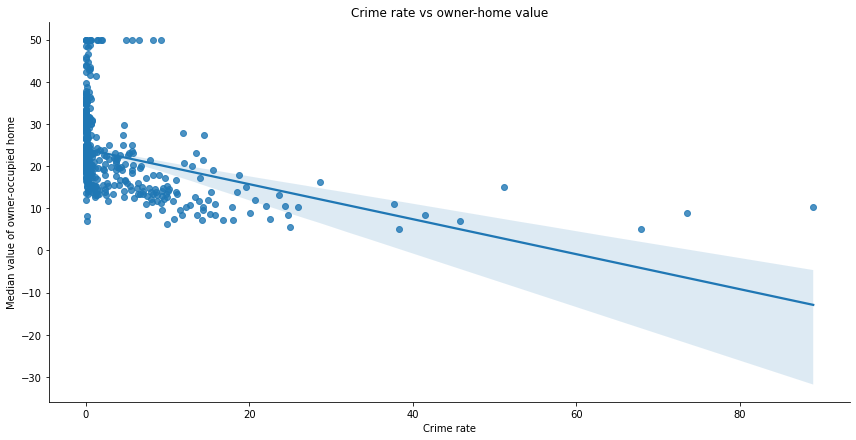

In [ ]:
sns.lmplot(x='CRIM',y='MEDV',data=dataset,aspect=2,height=6)
plt.xlabel('Crime rate')
plt.ylabel('Median value of owner-occupied home')
plt.title('Crime rate vs owner-home value')

### Does price decrease as NOX increases ?

Text(0.5, 1.0, 'Nitric oxide concentration vs owner-home value')

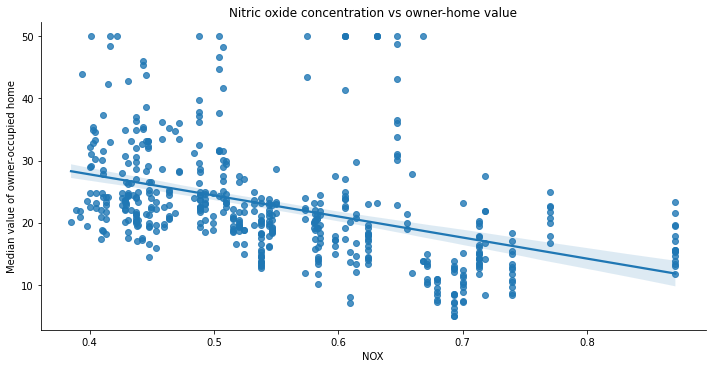

In [ ]:
sns.lmplot(x='NOX', y='MEDV', data=dataset, aspect=2)
plt.xlabel('NOX')
plt.ylabel('Median value of owner-occupied home')
plt.title('Nitric oxide concentration vs owner-home value')



### Effect of TAX on MEDV

Text(0.5, 1.0, 'full-value property-tax rate per $10,000 [$/10k] vs owner-home value')

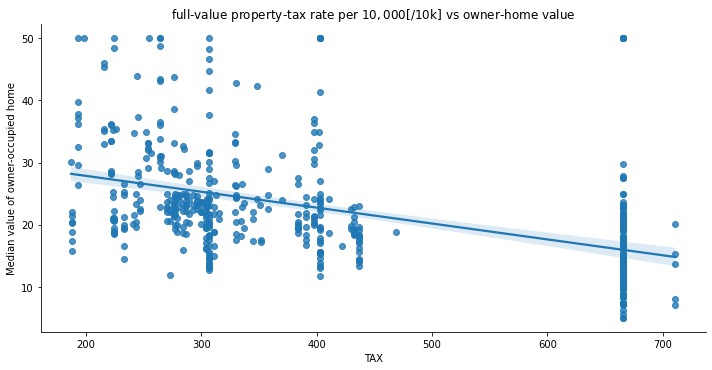

In [ ]:
sns.lmplot(x='TAX', y='MEDV', data=dataset, aspect=2)
plt.xlabel('TAX')
plt.ylabel('Median value of owner-occupied home')
plt.title('full-value property-tax rate per $10,000 [$/10k] vs owner-home value')


### Effect Of AGE on MEDV

Text(0.5, 1.0, 'proportion of owner-occupied units built prior to 1940 vs owner-home value')

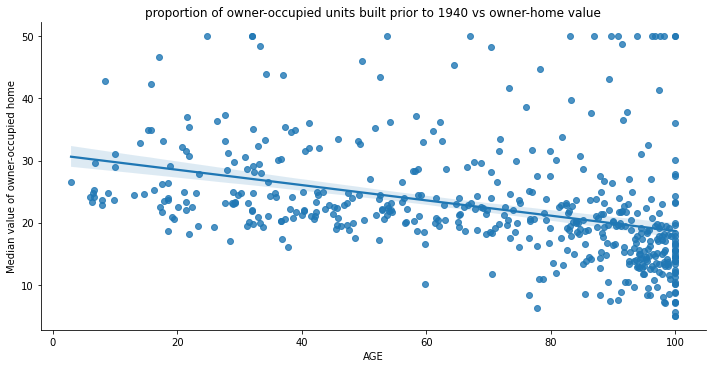

In [ ]:
sns.lmplot(x='AGE', y='MEDV', data=dataset, aspect=2)
plt.xlabel('AGE')
plt.ylabel('Median value of owner-occupied home')
plt.title('proportion of owner-occupied units built prior to 1940 vs owner-home value')


### Effect of number of rooms per dwelling on prices 

Text(0.5, 1.0, 'average number of rooms per dwelling vs owner-home value')

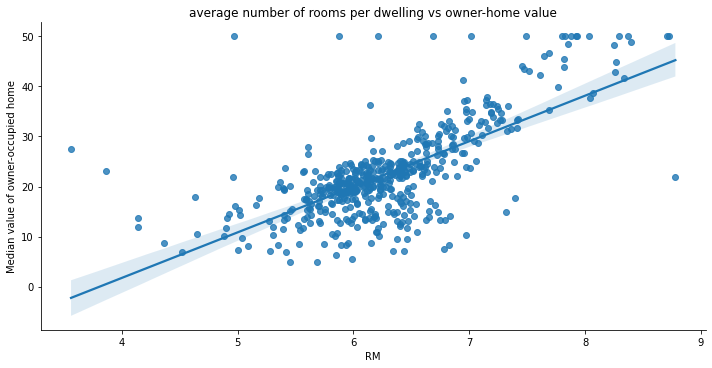

In [ ]:
sns.lmplot(x='RM', y='MEDV', data=dataset, aspect=2)
plt.xlabel('RM')
plt.ylabel('Median value of owner-occupied home')
plt.title('average number of rooms per dwelling vs owner-home value')


## ***Multiple Linear Regression Model*** 

### Training the Multiple Linear Regression model on the Training set


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the Test set results

In [ ]:
y_pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis = 1)) 
#concatenate function expect a tuple of arrays, so we add () , we reshaped because we wanted to print them vertically

[[24.94 22.6 ]
 [23.75 50.  ]
 [29.33 23.  ]
 [11.98  8.3 ]
 [21.37 21.2 ]
 [19.19 19.9 ]
 [20.57 20.6 ]
 [21.21 18.7 ]
 [19.05 16.1 ]
 [20.35 18.6 ]
 [ 5.44  8.8 ]
 [16.94 17.2 ]
 [17.15 14.9 ]
 [ 5.39 10.5 ]
 [40.2  50.  ]
 [32.31 29.  ]
 [22.46 23.  ]
 [36.5  33.3 ]
 [31.04 29.4 ]
 [23.17 21.  ]
 [24.75 23.8 ]
 [24.5  19.1 ]
 [20.66 20.4 ]
 [30.45 29.1 ]
 [22.32 19.3 ]
 [10.19 23.1 ]
 [17.44 19.6 ]
 [18.26 19.4 ]
 [35.63 38.7 ]
 [20.82 18.7 ]
 [18.27 14.6 ]
 [17.72 20.  ]
 [19.34 20.5 ]
 [23.62 20.1 ]
 [28.98 23.6 ]
 [19.45 16.8 ]
 [11.13  5.6 ]
 [24.82 50.  ]
 [18.05 14.5 ]
 [15.6  13.3 ]
 [26.21 23.9 ]
 [20.81 20.  ]
 [22.17 19.8 ]
 [15.48 13.8 ]
 [22.62 16.5 ]
 [24.89 21.6 ]
 [19.75 20.3 ]
 [23.05 17.  ]
 [ 9.85 11.8 ]
 [24.36 27.5 ]
 [21.48 15.6 ]
 [17.62 23.1 ]
 [24.39 24.3 ]
 [29.95 42.8 ]
 [13.57 15.6 ]
 [21.54 21.7 ]
 [20.53 17.1 ]
 [15.03 17.2 ]
 [14.32 15.  ]
 [22.12 21.7 ]
 [17.07 18.6 ]
 [21.54 21.  ]
 [32.97 33.1 ]
 [31.37 31.5 ]
 [17.79 20.1 ]
 [32.75 29.8 ]
 [18.75 15

### Plotting our predictions

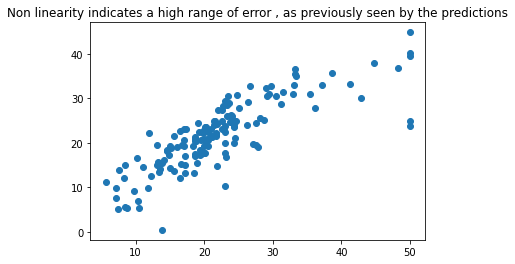

In [ ]:
plt.scatter(y_test, y_pred)
plt.title('Non linearity indicates a high range of error , as previously seen by the predictions')
plt.show()

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred)
print('As can be seen , the MSE is too high , thus we need to try a different model')

Test set evaluation:
_____________________________________
MAE: 3.6099040603818096
MSE: 27.195965766883408
RMSE: 5.214975145375423
R2 Square 0.6733825506400171
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.103606103908007
MSE: 19.958219814238042
RMSE: 4.4674623461466405
R2 Square 0.7645451026942549
__________________________________
As can be seen , the MSE is too high , thus we need to try a different model


### **`Slope And Intercept**

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-1.21e-01  4.45e-02  1.13e-02  2.51e+00 -1.62e+01  3.86e+00 -9.99e-03
 -1.50e+00  2.42e-01 -1.11e-02 -1.02e+00  6.81e-03 -4.87e-01]
37.93710774183309


## ***Polynomial Regression***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

x_train_2_d = poly_reg.fit_transform(x_train)
x_test_2_d = poly_reg.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(x_train_2_d,y_train)

test_pred = lin_reg.predict(x_test_2_d)
train_pred = lin_reg.predict(x_train_2_d)

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('the model is much more performant on the training set , this is a case of OVERFITTING')

Test set evaluation:
_____________________________________
MAE: 3.0553482484268515
MSE: 29.004173890741928
RMSE: 5.385552329217675
R2 Square 0.6516663766166686
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.5572992381571373
MSE: 4.123989210667036
RMSE: 2.0307607467811257
R2 Square 0.9513476920724716
__________________________________
the model is much more performant on the training set , this is a case of OVERFITTING


In [ ]:
print(np.concatenate((test_pred.reshape(len(test_pred),1), y_test.reshape(len(y_test),1)),axis = 1)) 


[[ 23.67  22.6 ]
 [ 26.88  50.  ]
 [ 29.84  23.  ]
 [ 10.18   8.3 ]
 [ 20.04  21.2 ]
 [ 19.85  19.9 ]
 [ 22.22  20.6 ]
 [ 20.5   18.7 ]
 [ 12.24  16.1 ]
 [ 16.98  18.6 ]
 [  7.42   8.8 ]
 [ 13.12  17.2 ]
 [ 14.06  14.9 ]
 [  8.23  10.5 ]
 [ 48.62  50.  ]
 [ 36.37  29.  ]
 [ 23.66  23.  ]
 [ 37.13  33.3 ]
 [ 31.93  29.4 ]
 [ 22.32  21.  ]
 [ 24.92  23.8 ]
 [ 21.58  19.1 ]
 [ 20.85  20.4 ]
 [ 27.52  29.1 ]
 [ 17.97  19.3 ]
 [ 30.37  23.1 ]
 [ 16.37  19.6 ]
 [ 18.16  19.4 ]
 [ 34.44  38.7 ]
 [ 13.98  18.7 ]
 [ 16.52  14.6 ]
 [ 18.28  20.  ]
 [ 19.61  20.5 ]
 [ 19.33  20.1 ]
 [ 26.44  23.6 ]
 [ 15.97  16.8 ]
 [  6.65   5.6 ]
 [ 36.79  50.  ]
 [ 16.68  14.5 ]
 [ 13.43  13.3 ]
 [ 22.17  23.9 ]
 [ 19.53  20.  ]
 [ 19.29  19.8 ]
 [ 18.93  13.8 ]
 [ 10.46  16.5 ]
 [ 22.45  21.6 ]
 [ 17.58  20.3 ]
 [  9.15  17.  ]
 [ 12.55  11.8 ]
 [ 22.93  27.5 ]
 [-27.93  15.6 ]
 [ 25.61  23.1 ]
 [ 20.04  24.3 ]
 [ 53.12  42.8 ]
 [  7.03  15.6 ]
 [ 21.03  21.7 ]
 [ 16.89  17.1 ]
 [ 17.33  17.2 ]
 [ 16.57  15. 

### **Slope And Intercept**

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-1.70e+08 -1.07e+00  1.91e-01 -6.38e+00  1.53e+01 -1.26e+01  4.14e+00
  1.26e+00 -1.15e+01  2.36e-02  1.09e-01  2.29e+00 -1.50e-01 -1.54e+00
  2.36e-03  3.03e-01  6.23e-01  1.36e+00 -1.04e-01  6.79e-02 -3.52e-03
  1.00e-01  6.37e-01 -4.91e-02  3.21e-01 -6.88e-05  1.21e-02 -1.62e-03
 -7.13e-03 -7.36e-02 -1.66e+00  2.97e-02  3.69e-04  1.32e-03  2.13e-03
  6.19e-04 -1.16e-02  1.27e-03 -4.20e-03  4.98e-02 -1.78e-01  1.20e+00
  4.19e-01  5.11e-03  2.02e-01 -3.60e-02  1.58e-03 -5.23e-02  4.63e-03
 -1.47e-02  1.53e+01 -3.44e+01 -6.64e+00  6.42e-02 -6.52e-01  5.06e-01
 -1.04e-02 -1.16e+00  1.49e-01 -5.26e-01  4.30e+00  1.15e+01 -3.69e-01
  1.45e+01 -1.57e+00  8.29e-02 -7.94e+00  3.37e-02  1.33e+00  9.52e-01
 -9.53e-02  5.90e-01  1.03e-01 -2.76e-02 -4.71e-01  4.20e-03 -2.57e-02
  3.37e-04 -3.13e-03  1.97e-02 -8.02e-04 -5.63e-03 -7.16e-04 -9.15e-03
  3.95e-01 -1.12e-01 -3.58e-03 -1.24e-01 -5.69e-03  9.20e-02 -1.86e-01
  1.17e-02 -5.76e-02 -1.61e-03 -3.62e-02 -1.05e-04  5.32e-03 -6.59e-05
  3.17

## ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=150)
rf_regressor.fit(x_train, y_train)

test_pred = rf_regressor.predict(x_test)
train_pred = rf_regressor.predict(x_train)



In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.46580701754386
MSE: 14.65967836842106
RMSE: 3.828795942384637
R2 Square 0.8239405506620437
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.7875009416195858
MSE: 1.530339524168237
RMSE: 1.2370689245827158
R2 Square 0.9819459882264198
__________________________________


In [ ]:
print(np.concatenate((test_pred.reshape(len(test_pred),1), y_test.reshape(len(y_test),1)),axis = 1)) 


[[24.04 22.6 ]
 [29.76 50.  ]
 [22.1  23.  ]
 [10.86  8.3 ]
 [20.16 21.2 ]
 [20.87 19.9 ]
 [20.86 20.6 ]
 [20.38 18.7 ]
 [20.1  16.1 ]
 [18.91 18.6 ]
 [ 8.43  8.8 ]
 [14.93 17.2 ]
 [14.98 14.9 ]
 [ 9.31 10.5 ]
 [47.47 50.  ]
 [33.77 29.  ]
 [21.08 23.  ]
 [34.43 33.3 ]
 [25.45 29.4 ]
 [21.31 21.  ]
 [23.7  23.8 ]
 [22.14 19.1 ]
 [19.56 20.4 ]
 [24.22 29.1 ]
 [19.96 19.3 ]
 [18.54 23.1 ]
 [18.78 19.6 ]
 [16.01 19.4 ]
 [44.08 38.7 ]
 [18.69 18.7 ]
 [14.73 14.6 ]
 [17.27 20.  ]
 [20.47 20.5 ]
 [20.96 20.1 ]
 [22.89 23.6 ]
 [17.54 16.8 ]
 [ 8.98  5.6 ]
 [29.16 50.  ]
 [14.49 14.5 ]
 [14.99 13.3 ]
 [23.14 23.9 ]
 [20.63 20.  ]
 [22.35 19.8 ]
 [15.45 13.8 ]
 [23.22 16.5 ]
 [22.66 21.6 ]
 [20.6  20.3 ]
 [16.14 17.  ]
 [14.96 11.8 ]
 [25.28 27.5 ]
 [15.77 15.6 ]
 [19.82 23.1 ]
 [20.11 24.3 ]
 [40.46 42.8 ]
 [15.08 15.6 ]
 [20.01 21.7 ]
 [19.48 17.1 ]
 [18.79 17.2 ]
 [24.55 15.  ]
 [20.34 21.7 ]
 [21.67 18.6 ]
 [20.65 21.  ]
 [33.64 33.1 ]
 [27.76 31.5 ]
 [18.25 20.1 ]
 [27.07 29.8 ]
 [16.22 15

# ***As Can Be Seen , The Random Forest Had The Best Metrics Out Of All The Algorithms We Tried Here , Therefore It Is The Best Choice*** 

In [ ]:
print (rf_regressor.predict([[0.5,10,3,1,0.6,5,60,10,4,400,20,200,10]]) , 'k$')

[19.79] k$
